In [4]:
# Librairies:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn import decomposition, preprocessing, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

colors = ["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0","#a6133f"]

# Import des donnees:
Complet_df = pd.read_csv("Complet_data.csv")

In [5]:
Complet_df.info()
Complet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_zone                           167 non-null    int64  
 1   zone                             167 non-null    object 
 2   evo_pop                          167 non-null    float64
 3   pib/hab                          167 non-null    float64
 4   dispo_prot_(g/hab/j)             167 non-null    float64
 5   dispo_prot_animal_(g/hab/j)      167 non-null    float64
 6   ratio_prot_animal/prot_tot       167 non-null    float64
 7   dispo_prot_volaille_(g/hab/j)    167 non-null    float64
 8   import_volaille_(t/hab)          167 non-null    float64
 9   production_volaille_(t/hab)      167 non-null    float64
 10  dispo_int_volaille_(t/hab)       167 non-null    float64
 11  ratio_prot_volaille/prot_animal  167 non-null    float64
 12  iso3                  

,c_zone,evo_pop,pib/hab,dispo_prot_(g/hab/j),dispo_prot_animal_(g/hab/j),ratio_prot_animal/prot_tot,dispo_prot_volaille_(g/hab/j),import_volaille_(t/hab),production_volaille_(t/hab),dispo_int_volaille_(t/hab),ratio_prot_volaille/prot_animal
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,125.802395,15.236168,13745.740515,81.301796,36.897605,0.424186,7.209641,0.011012,0.016269,0.022400,0.187195
std,73.144455,14.702737,18754.691709,20.866000,20.725306,0.160382,5.625804,0.018807,0.017340,0.018546,0.110492
min,1.000000,-12.690000,393.234522,40.700000,6.000000,0.091324,0.040000,0.000000,0.000000,0.000132,0.006667
25%,64.500000,4.767000,1883.668353,64.150000,18.700000,0.281447,2.245000,0.000400,0.002322,0.006853,0.105829
50%,121.000000,12.381000,5943.087543,81.700000,35.700000,0.430108,6.650000,0.003941,0.009602,0.018941,0.175714
75%,186.500000,24.829000,16343.671748,97.000000,52.150000,0.560608,10.390000,0.011771,0.025127,0.031778,0.261027
max,276.000000,75.598000,103856.495616,143.300000,103.000000,0.730534,27.870000,0.124139,0.076299,0.077148,0.505030


In [6]:
Complet_df["c_zone"] = Complet_df["c_zone"].apply(str)

In [7]:
#Information sur les variables principales:
Complet_df.iloc[:,2:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   evo_pop                          167 non-null    float64
 1   pib/hab                          167 non-null    float64
 2   dispo_prot_(g/hab/j)             167 non-null    float64
 3   dispo_prot_animal_(g/hab/j)      167 non-null    float64
 4   ratio_prot_animal/prot_tot       167 non-null    float64
 5   dispo_prot_volaille_(g/hab/j)    167 non-null    float64
 6   import_volaille_(t/hab)          167 non-null    float64
 7   production_volaille_(t/hab)      167 non-null    float64
 8   dispo_int_volaille_(t/hab)       167 non-null    float64
 9   ratio_prot_volaille/prot_animal  167 non-null    float64
dtypes: float64(10)
memory usage: 13.2 KB


In [8]:
# Centrage et reduction:
std_scale = preprocessing.StandardScaler().fit(Complet_df.iloc[:,2:12])
Complet_scaled_df = std_scale.transform(Complet_df.iloc[:,2:12])

array([[<AxesSubplot:xlabel='evo_pop', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='pib/hab', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='dispo_prot_(g/hab/j)', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='dispo_prot_animal_(g/hab/j)', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='ratio_prot_animal/prot_tot', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='dispo_prot_volaille_(g/hab/j)', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='import_volaille_(t/hab)', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='production_volaille_(t/hab)', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='dispo_int_volaille_(t/hab)', ylabel='evo_pop'>,
        <AxesSubplot:xlabel='ratio_prot_volaille/prot_animal', ylabel='evo_pop'>],
       [<AxesSubplot:xlabel='evo_pop', ylabel='pib/hab'>,
        <AxesSubplot:xlabel='pib/hab', ylabel='pib/hab'>,
        <AxesSubplot:xlabel='dispo_prot_(g/hab/j)', ylabel='pib/hab'>,
        <AxesSubplot:xlabel='dispo_prot_animal_(g/hab/j)', ylabel='pib/hab'>,
 

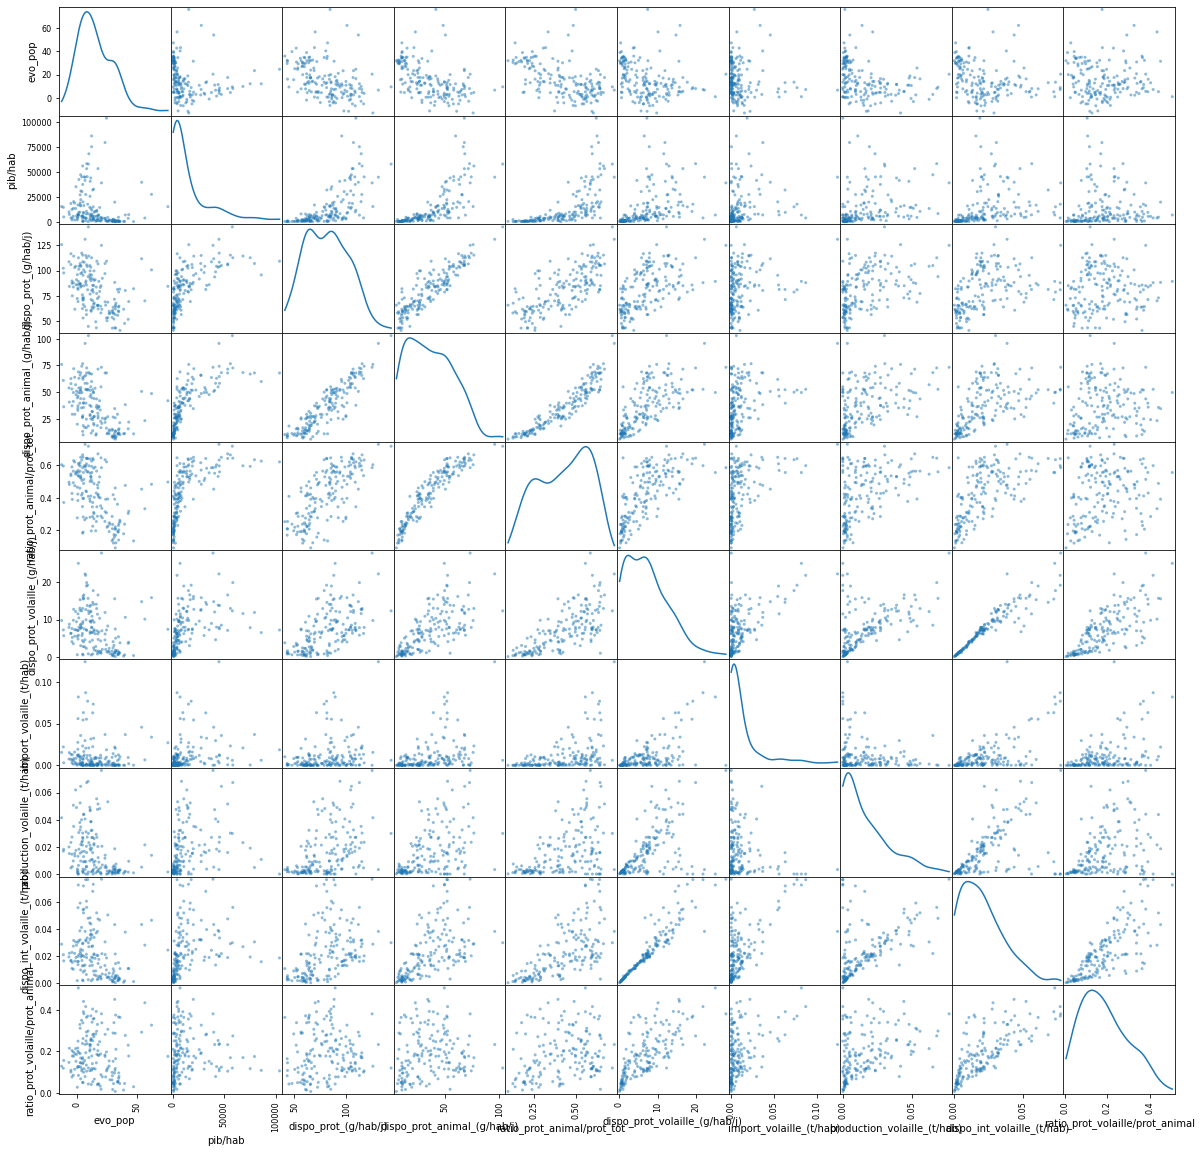

In [9]:
# Correlation deux a deux des variables:
pd.plotting.scatter_matrix(Complet_df.iloc[:, 2:12],diagonal='kde',figsize=(20,20))

Pour analyser la proximitée entre individus on pourrait croiser les variables 2 à 2, mais il est difficile de surveiller plusieurs cadrans en
même temps et étiqueter les points rendrait le tout illisible. Ce type de représentation n’est utile que pour effectuer un diagnostic rapide et repérer les points atypiques. Ici globalement nous avons quelques points qui s'éloignent du groupe sans pour autant complètement ressortir.

CAH:
===

Text(0.5, 1.0, 'Dendrogramme')

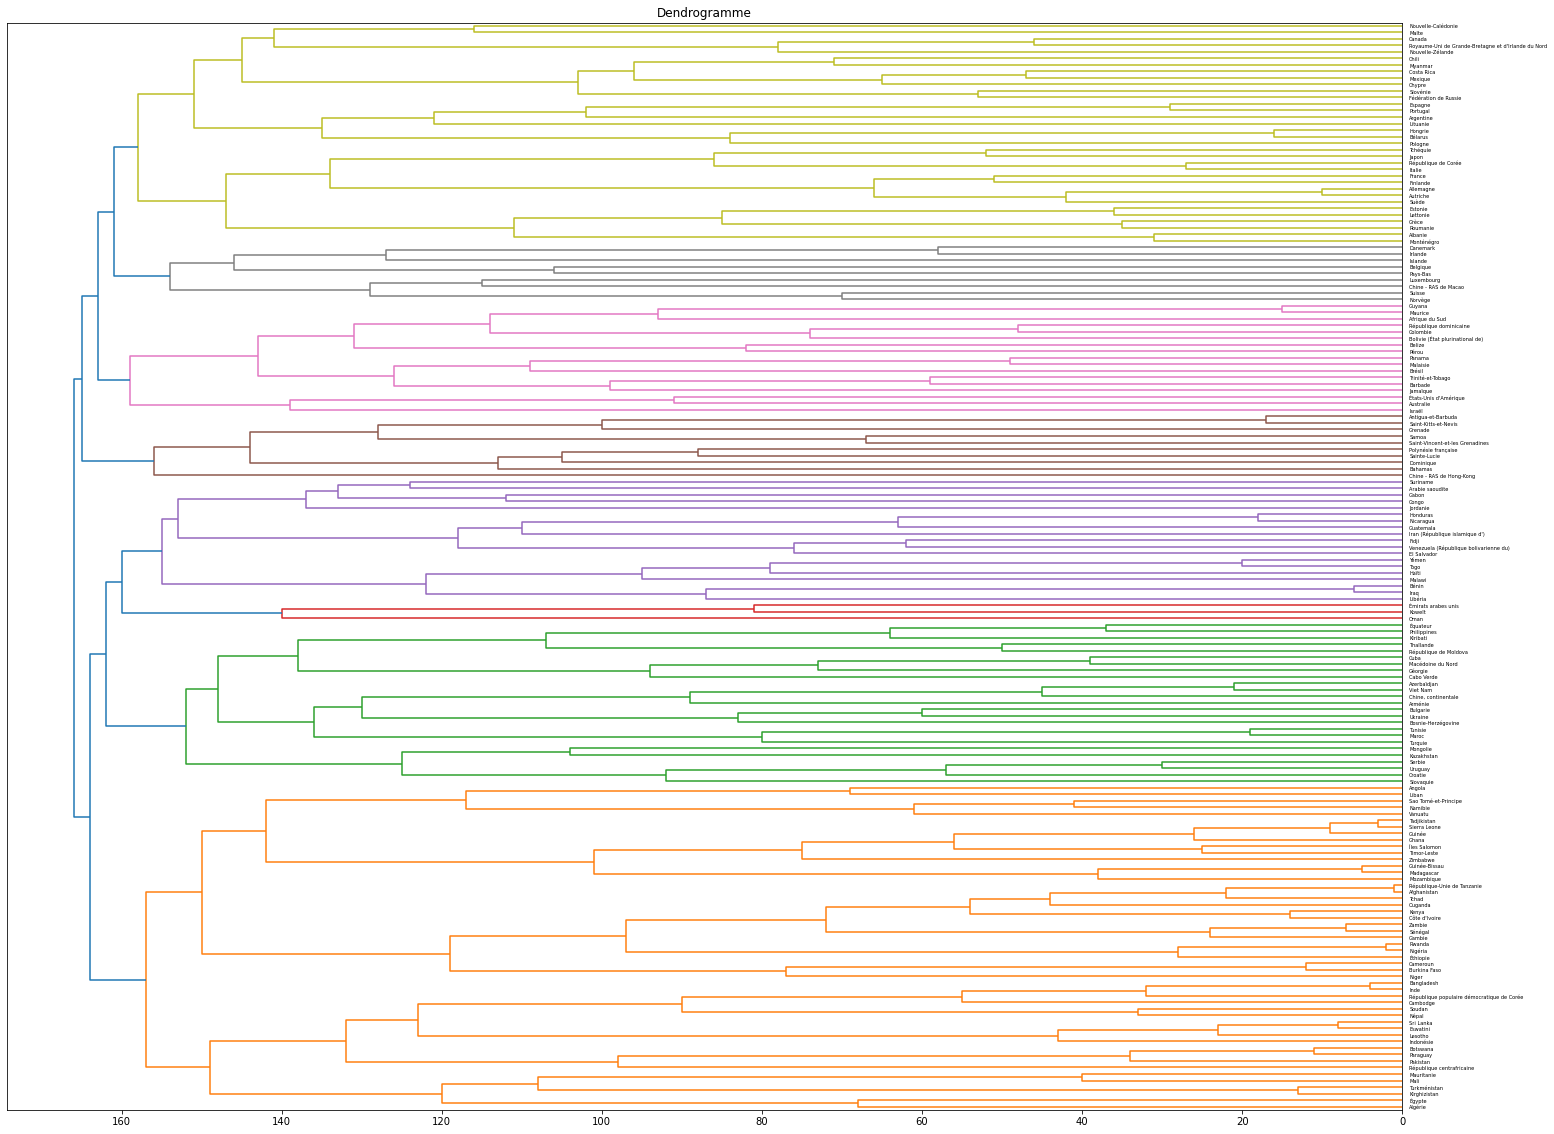

In [10]:
# Creation du dendrogramme:
ward = AgglomerativeClustering(linkage='ward',compute_full_tree=True).fit(Complet_scaled_df)

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])

# Dendrogramme avec clusters en couleurs:
plt.figure(figsize=(25, 20))
dendrogram(dendro,color_threshold=160,labels=list(Complet_df["zone"]),
           show_leaf_counts=True,orientation="left")
plt.title("Dendrogramme")

In [11]:
#Isoler les groupes CAH
Complet_df["cluster_cah"] = fcluster(dendro,t=160,criterion='distance')
cluster_cah = fcluster(dendro,t=160,criterion='distance')
Complet_df["cluster_cah"] = Complet_df["cluster_cah"].apply(str)

Complet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   c_zone                           167 non-null    object 
 1   zone                             167 non-null    object 
 2   evo_pop                          167 non-null    float64
 3   pib/hab                          167 non-null    float64
 4   dispo_prot_(g/hab/j)             167 non-null    float64
 5   dispo_prot_animal_(g/hab/j)      167 non-null    float64
 6   ratio_prot_animal/prot_tot       167 non-null    float64
 7   dispo_prot_volaille_(g/hab/j)    167 non-null    float64
 8   import_volaille_(t/hab)          167 non-null    float64
 9   production_volaille_(t/hab)      167 non-null    float64
 10  dispo_int_volaille_(t/hab)       167 non-null    float64
 11  ratio_prot_volaille/prot_animal  167 non-null    float64
 12  iso3                  

In [12]:
#Mapping des clusters obtenus:
px.choropleth(Complet_df, locations="iso3",
                    color="cluster_cah",
                    hover_name="zone",
                    color_discrete_sequence=px.colors.qualitative.Set2,
                    basemap_visible=True,
                    title= "Répartition géographiques des clusters obtenus par classification ascendante hiérarchique"
)

K-means:
===

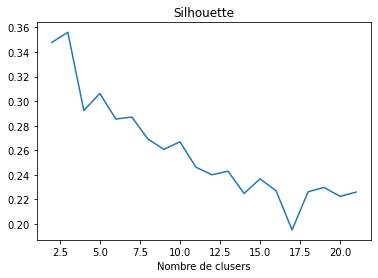

In [13]:
#Determination du nombre optimum de clusters pour le K-means: methode silhouette:

#Creation de la methode:
res = np.arange(20,dtype="double")                                   #On fait varrier le nombre de clusters de 2 à 20
for k in np.arange(20):
    km = KMeans(n_clusters=k+2)
    km.fit(Complet_scaled_df)
    res[k] = metrics.silhouette_score(Complet_scaled_df,km.labels_)

#Graphique:
plt.title("Silhouette")
plt.xlabel("Nombre de clusers")
plt.plot(np.arange(2,22,1),res)

C:\Users\leroc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'WCSS')

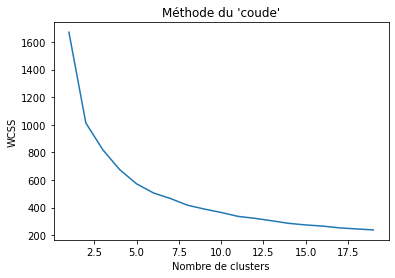

In [14]:
#Determination du nombre optimum de clusters pour le K-means: methode du coude:

#Creation de la methode:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Complet_scaled_df)
    wcss.append(kmeans.inertia_)

#Graphique:
plt.plot(range(1, 20), wcss)
plt.title("Méthode du 'coude'")
plt.xlabel("Nombre de clusters")
plt.ylabel('WCSS')

C:\Users\leroc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\leroc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\leroc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\leroc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Le nombre de classes optimal est 19


Text(0.5, 1.0, 'Détermination graphique du nombre de classes optimales pour le K-mean par la valeur Gap')

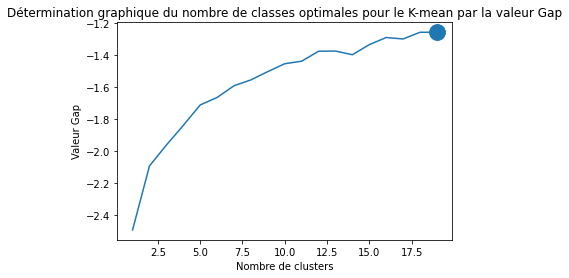

In [15]:
#Determination du nombre optimum de clusters pour le K-means: methode de gap statistic:

#Création de la méthode:
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

#Calcul
k, gapdf = optimalK(Complet_scaled_df, nrefs=5, maxClusters=20)
print("Le nombre de classes optimal est", k)

#Graphique:
plt.plot(gapdf.clusterCount, gapdf.gap)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250)
plt.xlabel("Nombre de clusters")
plt.ylabel("Valeur Gap")
plt.title("Détermination graphique du nombre de classes optimales pour le K-mean par la valeur Gap")

Text(0.5, 1.0, 'Détermination graphique du nombre de classes optimales pour le K-mean par le score de Davies Bouldin')

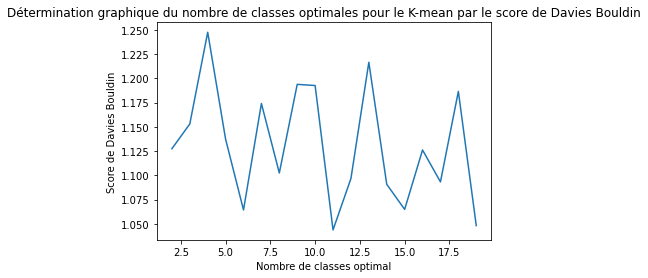

In [16]:
#Determination du nombre optimum de clusters pour le K-means: Score de Davies Bouldin:

# CReation de la methode:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
# Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(2,20))

for center in centers:
    scores.append(get_kmeans_score(Complet_scaled_df, center))

#Graphique:
plt.plot(centers, scores)
plt.xlabel("Nombre de classes optimal")
plt.ylabel("Score de Davies Bouldin")
plt.title("Détermination graphique du nombre de classes optimales pour le K-mean par le score de Davies Bouldin")

Le K-MEANS nécessite de déterminer à prioris un nombre de classes. Pour ce faire, on fait varier le nombre de groupes et
on surveille l’évolution d’un indicateur de qualité de la solution c.-à-d. l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus des autres groupes. Il existe plusieurs méthodes pour déterminer le nombre de cluster optimal:

- ***Dendrogram***: voir partie précédente, on dertemine plutôt arbitairement le nombre de cluster idéal en fonction de la répartition des noeuds,**on aurait ici 8 clusters dont un ne contenant qu'un faible nombre d'individus**.
- ***La méthode "Silouhette"*** : Le coefficient de silouhette est la différence entre la distance moyenne avec les points du même groupe (cohésion) et la distance moyenne avec les points des groupes voisins (séparation). Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. **Plus il est proche de 1 plus la classification sera bonne. Cette méthode semble indiquer que le nombre de classes optimal est 3, avec en seconde position 6 selon les itérations.**
- ***La méthode du "coude"***: On représente graphiquement la relation entre le nombre de clusters et la somme des carrés internes (Within Cluster Sum of Squares (WCSS)) puis on sélectionne le **nombre de clusters pour lequel le changement de WCSS commence à s'applatir. Cette méthode indique plutôt que le nombre de cluster optimal est entre 8 et 10.**
- ***Davies-Bouldin Index***: Il se base sur les même principes de cohésion et de séparation que ci dessus mais **plus il est bas plus le model sera optimisé. Il est minimal à 13.**
- ***Gap Statistic***: On compare la cohésion d'un cluster à une référence nulle pour les données (ex: la distribution sans clustering). D'après cette méthode, le nombre idéal de clusters est the value for which cluster compactness on the original data falls the farthest below this reference curve. **Plus la valeur est haute plus le model sera optimisé. Ici 18 ou 15 sont les plus fréquentes.**

Autres idicateurs non utilisés:
- *Calinski-Harabasz Index*:L'index de Calinski-Harabasz Index se calcul en divisant les variances des sommes des distances de chaque points à sont centroide au carré par la somme des carrés des distances entre chaque centroides. Plus il est élevé plus la qualité du model augmete.
- *Bayesian information criterion (BIC)*: Ce score utilise une méthode basée sur la maximum de vraissemblance, le model sera meilleur si le BIC est bas.

Remarque: Il est possible d'observer des variation dans ces indications puisqu'elles se basent sur des itération de k-means, chaque itérations sera différentes, il est important de relancer les calculs plusieurs fois pour trouver le nombre de cluster qui resortira le plus souvent, ici **6**.

source["https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad"]

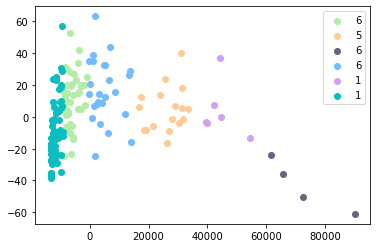

Text(0.5, 1.0, 'Projection des 6 centres sur le 1e plan factoriel')

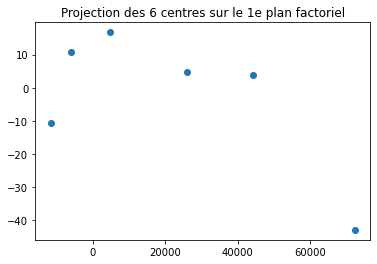

In [17]:
# Nombre de clusters:
n_clust = 6

# Clustering par K-means:
km = KMeans(n_clusters=n_clust)
km.fit(Complet_df.iloc[:,2:12])

# Ajout d'une colonne contenant le cluster attribue:
clusters_km = km.labels_+1                              #+1 pour éviter d'avoir un cluster '0'
Complet_df["cluster_km"] = km.labels_+1
Complet_df["cluster_km"] = Complet_df["cluster_km"].apply(str)

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca_km = decomposition.PCA(n_components=3).fit(Complet_df.iloc[:,2:12])

acp_km = PCA(n_components=3).fit_transform(Complet_df.iloc[:,2:12])
for couleur,k in zip(["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0"],[0,1,2,3,4,5]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur)
    plt.legend(clusters_km)
plt.show()

# Affichage des positions des centres de classes
plt.figure()
centroids_km = km.cluster_centers_
centroids_km_projected = pca_km.transform(centroids_km)
plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids_km)))

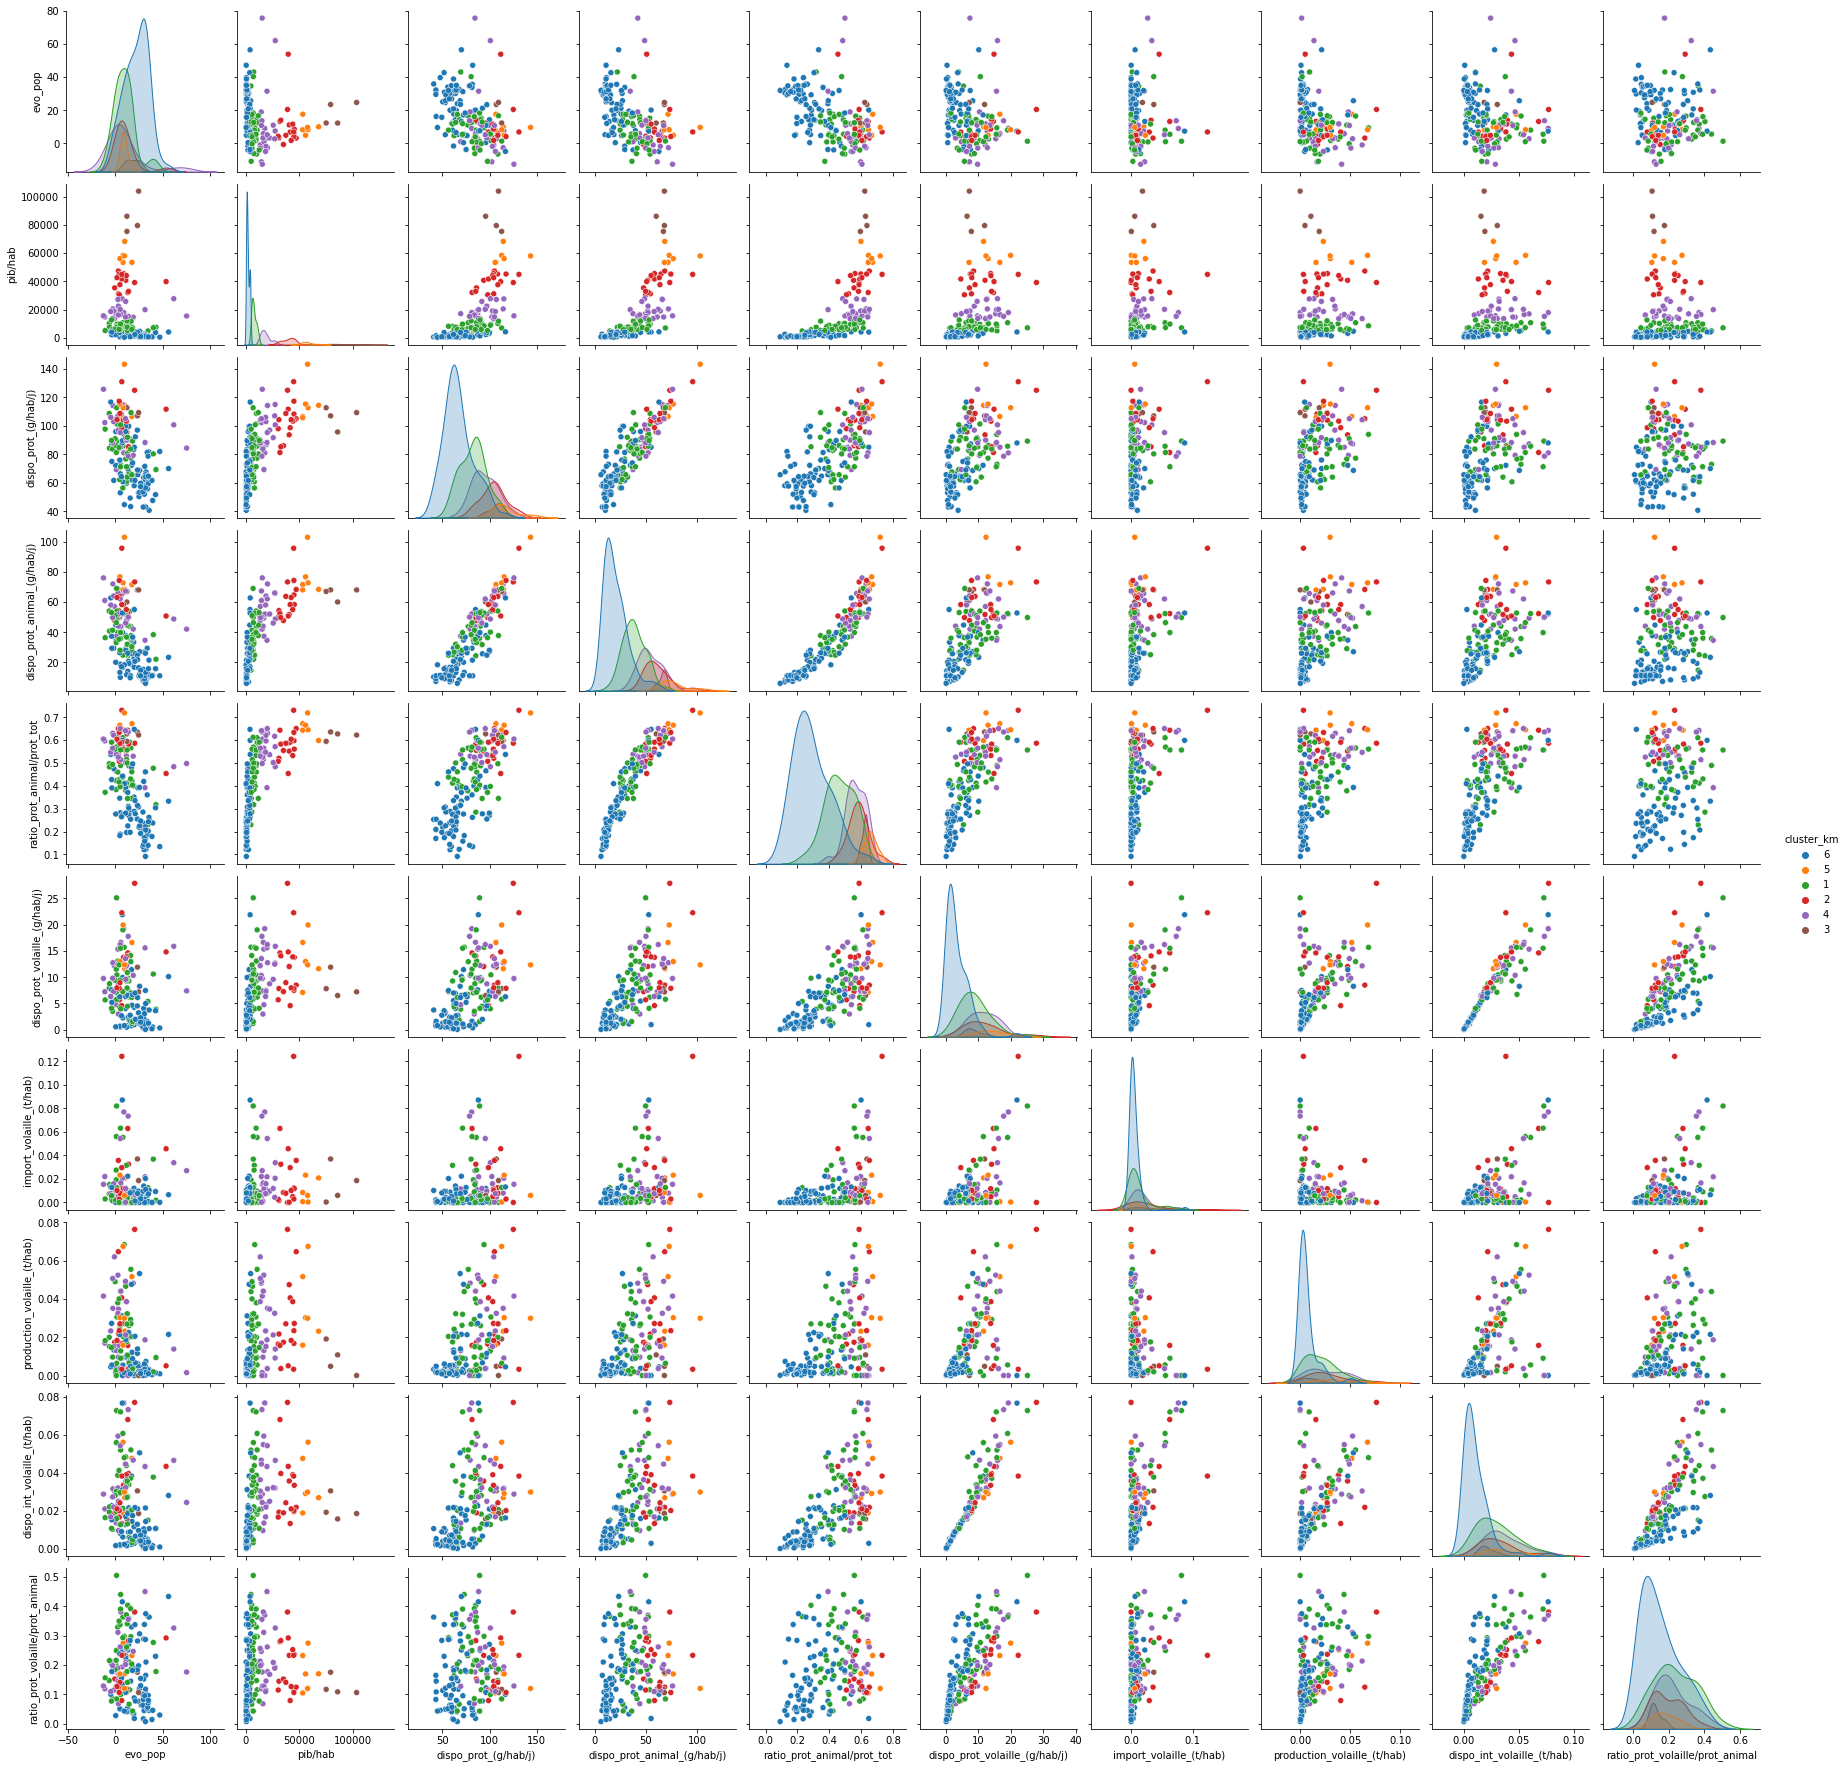

In [18]:
#Pair plt
sns.pairplot(Complet_df, hue="cluster_km")

#long (1min30)

In [19]:
# Changement de types:
Complet_df["cluster_km"] = Complet_df["cluster_km"].apply(str)

#Mapping des clusters obtenus:
px.choropleth(Complet_df, locations="iso3",
                    color="cluster_km",
                    hover_name="zone",
                    color_discrete_sequence=px.colors.qualitative.Set2,
                    basemap_visible=True,
                    title= "Répartition géographiques des clusters obtenus par K-means"
)

In [20]:
#Correspondance avec les groupes de la CAH
pd.crosstab(Complet_df["cluster_cah"],Complet_df["cluster_km"])

cluster_km,1,2,3,4,5,6
cluster_cah,,,,,,
1,4,0,0,0,0,46
2,12,0,0,2,0,11
3,6,1,0,3,0,12
4,4,2,0,3,0,1
5,9,1,0,3,2,2
6,0,2,4,0,3,0
7,6,11,0,14,1,2


In [68]:
#Denombrement des pays par clusters:
#Pour les cluster issus de la CAH:
print(Complet_df.groupby(Complet_df["cluster_cah"]).size())

#Pour les clusters issus du K-means:
print(Complet_df.groupby(Complet_df["cluster_km"]).size())

cluster_cah
1    50
2    25
3    22
4    10
5    17
6     9
7    34
dtype: int64
cluster_km
1    41
2    17
3     4
4    25
5     6
6    74
dtype: int64


On s'apperçoit que la correspondance n'est pas parfaite entre les groupes définis par les deux méthodes mais reste assez bonne.

ACP:
===

In [22]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color="black"))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor="black")
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, c=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, c=c,)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha)

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, edgecolor="grey")
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=True)


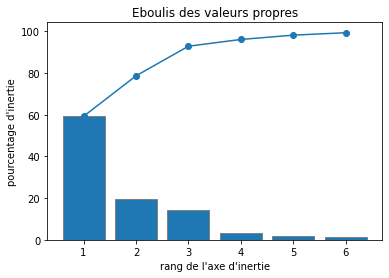

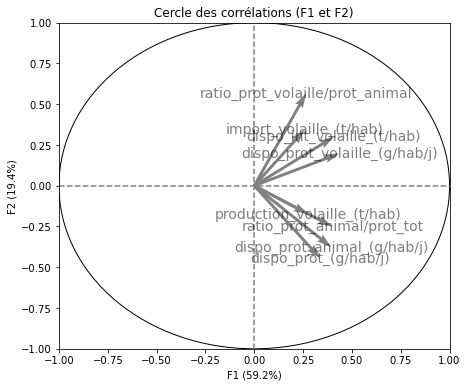

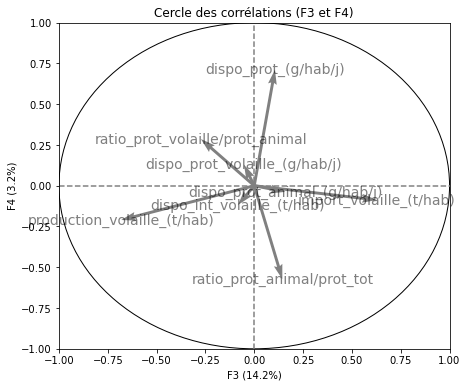

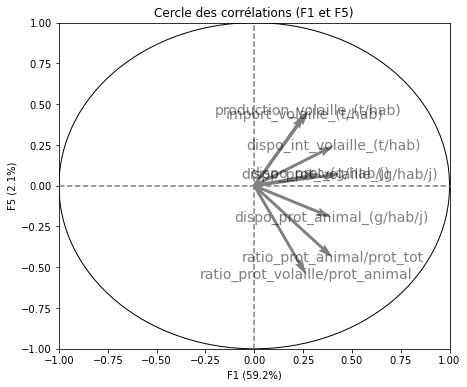

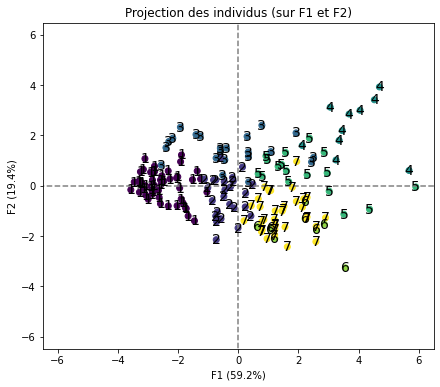

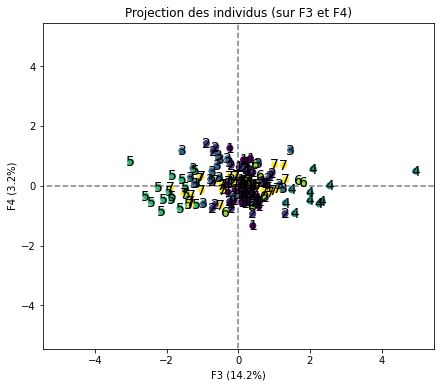

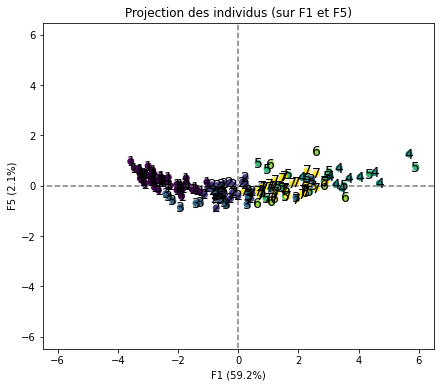

In [50]:
# Choix du nombre de composantes à calculer (on prend large ici afin de reduire à l'interpretation ne garder que les 3 premieres)
n_comp = 6

# Centrage et reduction
std_scale = preprocessing.StandardScaler().fit(Complet_df.iloc[:,4:12])
Complet_scaled_df = std_scale.transform(Complet_df.iloc[:,4:12])

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
composantes_principales = pca.fit(Complet_scaled_df)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des correlations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(0,4)], labels = np.array(Complet_df.iloc[:,4:12].columns))

# Projection des individus
Complet_projected = pca.transform(Complet_scaled_df)
display_factorial_planes(Complet_projected, n_comp, pca, [(0,1),(2,3),(0,4)],labels= cluster_cah, c=cluster_cah)
plt.show()
#PROBLEME ajouter legende plutôt que labels par points...

On choisi d'interpréter trois dimension d'après la courbe d'éboulement (critère du coude et 1/nombre de variable =12,5, si une dimension explique moins on s'arrete avant, ici dimension 4)

K-means sur dimensions ACP:
---

C:\Users\leroc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'WCSS')

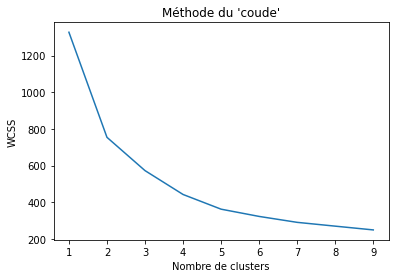

In [24]:
#Determination du nombre optimal de clusters pour le K-means sur les dimensions de l'ACP: methode du coude:

#calculs:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Complet_projected)
    wcss.append(kmeans.inertia_)

#Graphique:
plt.plot(range(1, 10), wcss)
plt.title("Méthode du 'coude'")
plt.xlabel("Nombre de clusters")
plt.ylabel('WCSS')

#PROBLEME: choisir une autre méthode?

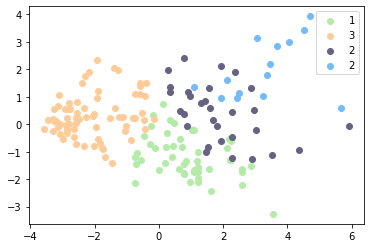

Text(0.5, 1.0, 'Projection des 4 centres sur le 1e plan factoriel')

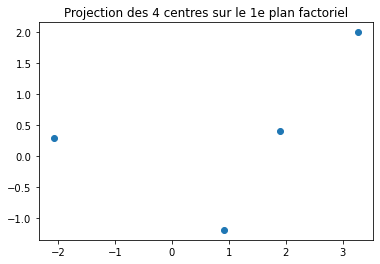

In [25]:
# Nombre de clusters:
n_clust_km_acp = 4

# Clustering par K-means:
km_acp = KMeans(n_clusters=n_clust_km_acp)
km_acp.fit(Complet_projected)

# Ajout d'une colonne contenant le cluster attribue:
clusters_km_acp = km_acp.labels_+1                              #+1 pour eviter d'avoir un cluster '0'

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca_km = decomposition.PCA(n_components=2).fit(Complet_projected)
acp_km = PCA(n_components=2).fit_transform(Complet_projected)
for couleur,k in zip(["#b2eca7","#ffcc97","#676283","#72bbff"],[0,1,2,3]):
    plt.scatter(acp_km[km_acp.labels_==k,0],acp_km[km_acp.labels_==k,1],c=couleur)
    plt.legend(clusters_km_acp)
plt.show()

#PROBLEME chager couleurs (c=)
#PROBLEME pas annoté (surtout)

# Affichage des positions des centres de classes
plt.figure()
centroids_kmacp = km_acp.cluster_centers_
centroids_kmacp_projected = pca_km.transform(centroids_kmacp)
plt.scatter(centroids_kmacp_projected[:,0],centroids_kmacp_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids_kmacp)))

Heatmap:
===

On souhaite ensuite avoir une heatmap avec les croisements entre les clusters de pays et les différentes variables

Text(0.5, 1.0, 'Heatmap sur les centroïdes de K-means')

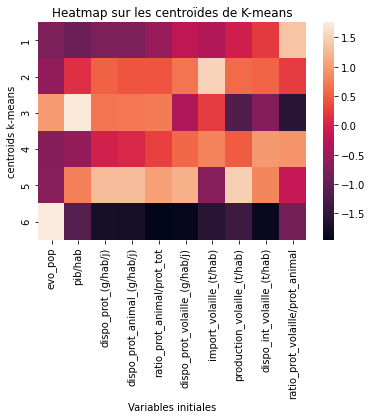

In [69]:
#Heatmap sur les centroides de k-means:

# Centrage et reduction:
centroid_std_scale = preprocessing.StandardScaler().fit(centroids_km)
centroids_scaled = centroid_std_scale.transform(centroids_km)

sns.heatmap(centroids_scaled, yticklabels=[1,2,3,4,5,6],xticklabels=Complet_df.iloc[:,2:12].columns.tolist())
plt.ylabel("centroids k-means")
plt.xlabel("Variables initiales")
plt.title("Heatmap sur les centroïdes de K-means")


Text(0.5, 1.0, 'Heatmap sur les moyennes des valeurs initiales pour la CAH')

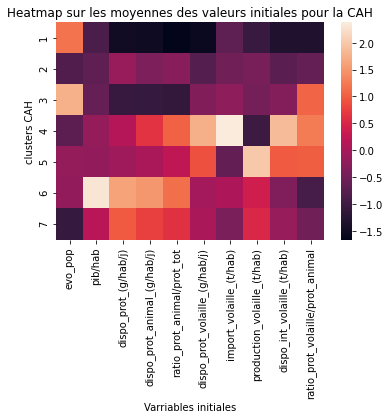

In [27]:
#Heatmap sur les moyennes des valeurs initiales pour la CAH:
moy_vi = Complet_df.groupby(Complet_df["cluster_cah"]).mean()

#Centrage et reduction:
moy_vi_std_scale = preprocessing.StandardScaler().fit(moy_vi)
moy_vi_scaled = moy_vi_std_scale.transform(moy_vi)


sns.heatmap(moy_vi_scaled,yticklabels=[1,2,3,4,5,6,7],xticklabels=Complet_df.iloc[:,2:12].columns.tolist())
plt.ylabel("clusters CAH")
plt.xlabel("Varriables initiales")
plt.title("Heatmap sur les moyennes des valeurs initiales pour la CAH")

In [28]:
# Export de Complet_Cluster_df en CSV :
#Complet_df.to_csv("C:\\Users\\leroc\\Dropbox\\2020 - 2021 OpenClassrooms, MOOC et conférences\\09 - Produisez une étude de marché avec R ou Python\\Complet_Cluster_data.csv",
#                index = False,
#                header=True)

Analyse du cluster sélectionné:
===

On séléctionne le cluster 1 de la KM après l'ACP.

In [59]:
liste = Complet_df.loc[(Complet_df["cluster_km"]=="1"),("zone")]
print(liste)

4              Iran (République islamique d')
5                                        Iraq
10                                 Kazakhstan
11                                   Jamaïque
23                                      Liban
30                                   Malaisie
34                                    Maurice
35                                    Mexique
45                          Macédoine du Nord
56                                   Paraguay
57                                      Pérou
64                                   Roumanie
66                       Fédération de Russie
68                               Sainte-Lucie
70            Saint-Vincent-et-les Grenadines
78                                   Botswana
79                             Afrique du Sud
81                                   Suriname
84                                     Brésil
87                               Turkménistan
89                                  Thaïlande
94                                

In [55]:
#Mapping des clusters selectionnes:
px.choropleth(Complet_df.loc[(Complet_df["cluster_km"]=="1")], locations="iso3",
                    color="cluster_km",
                    hover_name="zone",
                    color_discrete_sequence=px.colors.qualitative.Set2,
                    basemap_visible=True,
                    title= "Répartition géographiques des pays séléctionnés (cluster km)"
)

In [62]:
Complet_df.loc[(Complet_df["cluster_km"]=="1")].describe()


,evo_pop,pib/hab,dispo_prot_(g/hab/j),dispo_prot_animal_(g/hab/j),ratio_prot_animal/prot_tot,dispo_prot_volaille_(g/hab/j),import_volaille_(t/hab),production_volaille_(t/hab),dispo_int_volaille_(t/hab),ratio_prot_volaille/prot_animal
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,9.322268,7696.502391,82.373171,38.363415,0.462193,8.808537,0.012131,0.020524,0.029542,0.235809
std,11.333075,2145.893345,13.803985,11.103868,0.092266,4.911454,0.019624,0.016629,0.017809,0.117474
min,-10.930000,4862.948809,56.400000,14.700000,0.229687,1.190000,0.000000,0.000000,0.003174,0.042500
25%,1.293000,5945.018298,71.300000,30.300000,0.403135,5.660000,0.001360,0.006553,0.015935,0.155923
50%,7.943000,7141.225293,83.700000,36.700000,0.461187,7.930000,0.002984,0.018201,0.027518,0.214742
75%,14.481000,9585.023298,90.300000,44.700000,0.556551,10.880000,0.012516,0.029241,0.038751,0.337143
max,43.043000,12638.505687,112.700000,69.000000,0.612245,25.100000,0.081947,0.068329,0.072842,0.505030


In [72]:
print(Complet_df["pib/hab"].mean())
print(Complet_df["import_volaille_(t/hab)"].mean())
print(Complet_df["import_volaille_(t/hab)"].max())

13745.74051494012
0.011012344489949437
0.1241390675089326
0.0
